In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import r2_score,accuracy_score,recall_score,confusion_matrix,precision_score


In [9]:
data=pd.read_csv('/Users/omgajipara/Desktop/Data Science/AI:ML/Machine Learning/Supervised Learning/Classification/DecisionTree/DesicionTree.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [10]:
data=data.drop(['User ID','Gender'],axis=1)
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [11]:
x=data.iloc[:,:-1]
y=data['Purchased']

scaler=StandardScaler()
x_scaled=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x_scaled

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


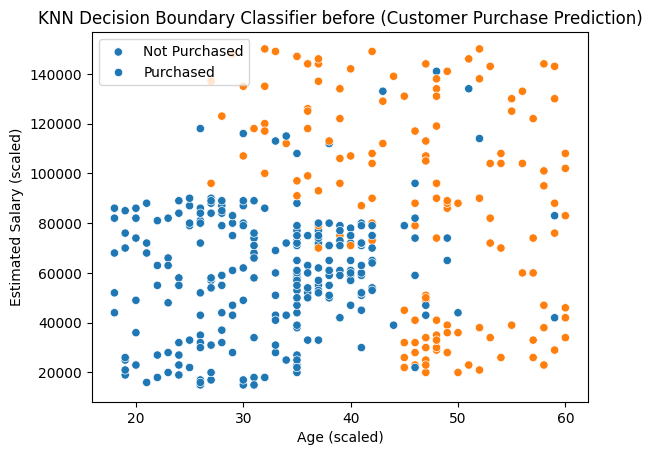

In [12]:
sns.scatterplot(x='Age',y='EstimatedSalary',data=data,hue='Purchased')
plt.title("KNN Decision Boundary Classifier before (Customer Purchase Prediction)")
plt.xlabel("Age (scaled)")
plt.ylabel("Estimated Salary (scaled)")
plt.legend(['Not Purchased', 'Purchased'], loc='upper left')
plt.savefig('assets/KNNClassifierBoundarybefore.jpg')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

best_diff = float('inf')
best_state = None
best_k = None
best_train_score = 0
best_test_score = 0

# Loop through random states and k values
for random_state in range(0, 100):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=random_state)
    
    for k in range(1, 21):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train, y_train)
        
        train_score = knn.score(x_train, y_train)
        test_score = knn.score(x_test, y_test)
        diff = abs(train_score - test_score)
        
        if diff < best_diff:
            best_diff = diff
            best_state = random_state
            best_k = k
            best_train_score = train_score
            best_test_score = test_score

print(f"Best Random State: {best_state}")
print(f"Best k (n_neighbors): {best_k}")
print(f"Train Accuracy: {best_train_score*100:.2f}%")
print(f"Test Accuracy: {best_test_score*100:.2f}%")
print(f"Score Difference: {best_diff*100:.2f}%")


Best Random State: 2
Best k (n_neighbors): 3
Train Accuracy: 92.50%
Test Accuracy: 92.50%
Score Difference: 0.00%


In [14]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=2)


In [15]:
data['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [16]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
print(knn.score(x_test,y_test)*100)
print(knn.score(x_train,y_train)*100)

92.5
92.5


In [18]:
input_data = [[51, 23000]]
input_scaled = scaler.transform(input_data)  # Use transform, NOT fit_transform
prediction = knn.predict(input_scaled)

print(prediction)

[1]


/Users/omgajipara/Desktop/Data Science/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/omgajipara/Desktop/Data Science/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


/Users/omgajipara/Desktop/Data Science/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


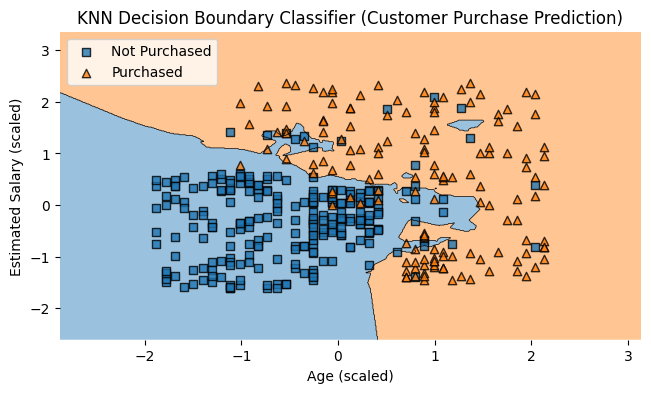

In [19]:

# Plot decision boundary
plt.figure(figsize=(7.5, 4))
plot_decision_regions(X=x_scaled.to_numpy(), y=y.to_numpy(), clf=knn)

plt.title("KNN Decision Boundary Classifier (Customer Purchase Prediction)")
plt.xlabel("Age (scaled)")
plt.ylabel("Estimated Salary (scaled)")
plt.legend(['Not Purchased', 'Purchased'], loc='upper left')
plt.savefig('assets/KNNClassifierBoundary.jpg')
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = knn.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[46  2]
 [ 4 28]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        48
           1       0.93      0.88      0.90        32

    accuracy                           0.93        80
   macro avg       0.93      0.92      0.92        80
weighted avg       0.93      0.93      0.92        80



In [21]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=knn, X=x_scaled, y=y, cv=10)
print("KNN Cross Validation Mean Accuracy:", accuracies.mean())


KNN Cross Validation Mean Accuracy: 0.8950000000000001


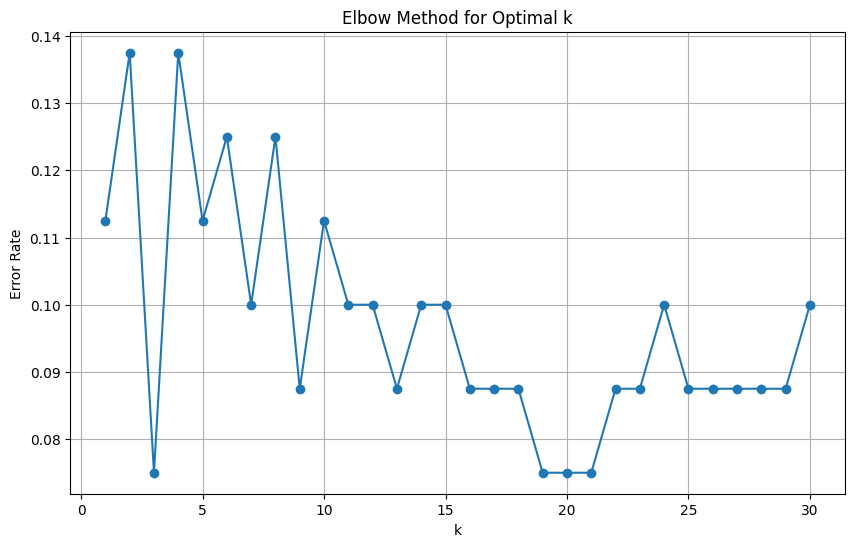

In [22]:
error_rate = []
for k in range(1, 31):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    pred_k = model.predict(x_test)
    error_rate.append(np.mean(pred_k != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,31), error_rate, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("k")
plt.ylabel("Error Rate")
plt.grid(True)
plt.show()
